# Objectives

1. Add Locus Coverage to Dataframe.
1. Plot Locus Coverage Phlyo.
1. Plot Locus Coverage Distribution.
1. Identify Interesting Samples.

---
# Setup

## Imports

In [1]:
import os
import dill
from Bio import Phylo
import copy
import math
import pandas as pd
from matplotlib import lines
import seaborn as sns

## File Paths

In [2]:
# jupyter notebook output
tree_df_dill = "../../results/mugration/mugration.df.obj"
tree_dill = "../../results/mugration/mugration.treetime.obj"
locus_cov_df_path = "../../results/locus_coverage/all/locus_coverage.txt"
auspice_colors_path = "../../results/parse_tree/parse_tree_colors.tsv"

outdir = "../../results/misc/"

# Create output directory if it doesn't exist
if not os.path.exists(outdir):
    os.mkdir(outdir)

## Variables

In [3]:
from config import *

#NAME_COL = "Sample"
NAME_COL = "Name"
SCRIPT_NAME = "misc"

## Import Tree

In [4]:
with open(tree_dill, "rb") as infile:
    tt = dill.load(infile)
tt.tree.ladderize(reverse=False)

## Import Dataframe

In [5]:
with open(tree_df_dill, "rb") as infile:
    tree_df = dill.load(infile)
tree_df

,UFboot,sCF,Branch_Length,Branch_Support_Color,coord_x,coord_y,Strain,Date,DateBP,Country,Province,CountryLat,CountryLon,ProvinceLat,ProvinceLon,Biovar,Branch_Major,Branch_Minor,BioSample,BioSampleComment,Branch_Number,timetree_rate,timetree_rate_fold_change,timetree_mutation_length,timetree_raw_date,timetree_num_date,timetree_num_date_confidence,timetree_num_date_bar,timetree_clock_length,timetree_coord_x,timetree_coord_y,timetree_reg_x,timetree_reg_y,timetree_reg_bad,Mugration_Branch_Number,Mugration_Branch_Number_Confidence,Mugration_Branch_Number_Entropy,Mugration_Branch_Major,Mugration_Branch_Major_Confidence,Mugration_Branch_Major_Entropy,Mugration_Branch_Minor,Mugration_Branch_Minor_Confidence,Mugration_Branch_Minor_Entropy,Mugration_Country,Mugration_Country_Confidence,Mugration_Country_Entropy,Mugration_Country_Lat,Mugration_Country_Lon,Mugration_Province,Mugration_Province_Confidence,Mugration_Province_Entropy,Mugration_Province_Lat,Mugration_Province_Lon
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NODE0,100,NA,0,black,2.14881e-07,16.1893,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,9.263554e-09,1.000000,2.148815e-07,-4000-09-21,-3999.277481,"[-4114.0959399021, -3791.54718956593]","[6135.0959399021, 5812.54718956593]",0.100000,0.100000,16.189335,-3999.277481,0.000000,False,0,1,8.55565e-08,0.PRE,0.998731,0.00977069,0.PRE2,0.392436,1.32907,Russia,0.99242,0.0484304,64.6863,97.7453,Krasnoyarsk Krai,0.382138,1.65207,63.3234,97.098
SAMEA3541827,NA,NA,3.8504e-06,grey,3.43983e-06,1,RISE509,[-2876:-2677],[-4897:-4698],Russia,Krasnoyarsk Krai,64.6863,97.7453,63.3234,97.098,Bronze Age,0.PRE,0.PRE2,SAMEA3541827,KEEP: SRA Ancient,0,2.800384e-09,0.302301,3.224947e-06,-2881-08-02,-2880.414384,"[-2875.9999999999995, -2676.9999999999995]","[4897.0, 4698.0]",1118.863097,1118.963097,1.000000,-2776.500000,0.000003,False,0,1,-1.00009e-12,0.PRE,1,-9.99867e-13,0.PRE2,1,-1.00009e-12,Russia,1,-1.00009e-12,64.6863,97.7453,Krasnoyarsk Krai,1,-1.00009e-12,63.3234,97.098
NODE1,100,85,1.32708e-05,black,8.39127e-06,3.15625,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.185209e-08,1.279433,8.176386e-06,-3356-01-28,-3355.925187,"[-3424.5669580911117, -3154.7902001929688]","[5445.566958091112, 5175.790200192969]",643.352294,643.452294,3.156250,-3355.925187,0.000008,False,0,1,8.55565e-08,0.PRE,0.999998,2.33079e-05,0.PRE1,0.999213,0.00727438,Russia,0.977706,0.136133,64.6863,97.7453,Panevezys County,0.442487,1.9261,55.9156,25.0312
SAMEA104233046,NA,NA,2.2484e-06,grey,1.05415e-05,2,Gyvakarai1,[-2621:-2472],[-4642:-4493],Lithuania,Panevezys County,55.35,23.75,55.9156,25.0312,Bronze Age,0.PRE,0.PRE1,SAMEA104233046,KEEP: SRA Ancient,0,2.591999e-09,0.279806,2.150201e-06,-2617-08-21,-2616.363588,"[-2620.9999999999995, -2471.9999999999995]","[4642.0, 4493.0]",739.561600,1383.013893,2.000000,-2546.500000,0.000010,False,0,1,-1.00009e-12,0.PRE,1,-1.00009e-12,0.PRE1,1,-1.00009e-12,Lithuania,1,-1.00009e-12,55.35,23.75,Panevezys County,1,-1.00009e-12,55.9156,25.0312
NODE2,100,94.6,1.36364e-05,black,2.28244e-05,4.3125,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.987130e-08,2.145105,1.443313e-05,-2652-12-16,-2651.043091,"[-2740.0327670266406, -2561.2954874168845]","[4761.032767026641, 4582.2954874168845]",704.882097,1348.334390,4.312500,-2651.043091,0.000023,False,0,1,8.55565e-08,0.PRE,1,2.10548e-07,0.PRE1,0.999999,1.69062e-05,Russia,0.97708,0.14249,64.6863,97.7453,Pärnu maakond,0.442563,1.92163,58.3195,24.3026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE_0000360,NA,NA,NA,NA,6.56282e-05,541.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.949873e-09,0.966138,1.779610e-21,1953-12-09,1953.939572,"[1926.3366503317973, 1954.0]","[94.66334966820273, 67.0]",1.314338,5953.317053,541.500000,1953.939572,0.000065,False,1,1,8.35157e-08,1.ORI,1,2.02107e-07,1.ORI1,1,9.61593e-07,United States 

## Import Locus Coverage

In [6]:
# Parse the metadata
locus_cov_df = pd.read_csv(locus_cov_df_path, sep='\t')
locus_cov_df.set_index("Sample", inplace=True)
locus_cov_df.columns = ["Chrom", "pCD1", "pMT1", "pPCP1", "pla"]
locus_cov_df.drop(columns="Chrom", inplace=True)
locus_cov_df

,pCD1,pMT1,pPCP1,pla
Sample,,,,
GCA_009909635.1_ASM990963v1_genomic,0.919181,0.938385,0.000000,0.000000
GCA_009669545.1_ASM966954v1_genomic,0.941384,0.941461,0.800666,1.000000
GCA_009669555.1_ASM966955v1_genomic,0.931143,0.940838,0.800250,1.000000
GCA_009669565.1_ASM966956v1_genomic,0.938070,0.939892,0.800458,1.000000
GCA_009669605.1_ASM966960v1_genomic,0.948012,0.941908,0.802122,1.000000
...,...,...,...,...
IP283,0.938767,0.946918,0.811174,1.000000
IP562,0.951042,0.012442,0.115273,0.133262
IP542,0.951269,0.647459,0.812734,1.000000


## Import Colors

In [7]:
colors_df = pd.read_csv(auspice_colors_path, sep='\t', header=None)
colors_df.columns = ["Attribute", "State", "Color"]
colors_df.fillna(NO_DATA_CHAR, inplace=True)
colors_df

,Attribute,State,Color
0,branch_number,0,#8000ff
1,branch_number,3,#00b4ec
2,branch_number,4,#80ffb4
3,branch_number,2,#ffb462
4,branch_number,1,#ff0000
...,...,...,...
202,province,Midlands,#ff1c0e
203,province,State of Mato Grosso,#ff150b
204,province,MSila,#ff0e07
205,province,La Paz,#ff0704


---
# 1. Add Locus Coverage to Dataframe

In [8]:
for locus in locus_cov_df.columns:
    tree_df["locus_coverage_" + locus] = [NO_DATA_CHAR for row in range(0,len(tree_df))]  
    for i in range(0, len(locus_cov_df[locus])):
        sample = locus_cov_df.index[i]
        if sample not in tree_df.index: continue
        cov = locus_cov_df[locus][i]
        tree_df.at[sample, "locus_coverage_" + locus] = cov

tree_df

,UFboot,sCF,Branch_Length,Branch_Support_Color,coord_x,coord_y,Strain,Date,DateBP,Country,Province,CountryLat,CountryLon,ProvinceLat,ProvinceLon,Biovar,Branch_Major,Branch_Minor,BioSample,BioSampleComment,Branch_Number,timetree_rate,timetree_rate_fold_change,timetree_mutation_length,timetree_raw_date,timetree_num_date,timetree_num_date_confidence,timetree_num_date_bar,timetree_clock_length,timetree_coord_x,timetree_coord_y,timetree_reg_x,timetree_reg_y,timetree_reg_bad,Mugration_Branch_Number,Mugration_Branch_Number_Confidence,Mugration_Branch_Number_Entropy,Mugration_Branch_Major,Mugration_Branch_Major_Confidence,Mugration_Branch_Major_Entropy,Mugration_Branch_Minor,Mugration_Branch_Minor_Confidence,Mugration_Branch_Minor_Entropy,Mugration_Country,Mugration_Country_Confidence,Mugration_Country_Entropy,Mugration_Country_Lat,Mugration_Country_Lon,Mugration_Province,Mugration_Province_Confidence,Mugration_Province_Entropy,Mugration_Province_Lat,Mugration_Province_Lon,locus_coverage_pCD1,locus_coverage_pMT1,locus_coverage_pPCP1,locus_coverage_pla
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NODE0,100,NA,0,black,2.14881e-07,16.1893,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,9.263554e-09,1.000000,2.148815e-07,-4000-09-21,-3999.277481,"[-4114.0959399021, -3791.54718956593]","[6135.0959399021, 5812.54718956593]",0.100000,0.100000,16.189335,-3999.277481,0.000000,False,0,1,8.55565e-08,0.PRE,0.998731,0.00977069,0.PRE2,0.392436,1.32907,Russia,0.99242,0.0484304,64.6863,97.7453,Krasnoyarsk Krai,0.382138,1.65207,63.3234,97.098,NA,NA,NA,NA
SAMEA3541827,NA,NA,3.8504e-06,grey,3.43983e-06,1,RISE509,[-2876:-2677],[-4897:-4698],Russia,Krasnoyarsk Krai,64.6863,97.7453,63.3234,97.098,Bronze Age,0.PRE,0.PRE2,SAMEA3541827,KEEP: SRA Ancient,0,2.800384e-09,0.302301,3.224947e-06,-2881-08-02,-2880.414384,"[-2875.9999999999995, -2676.9999999999995]","[4897.0, 4698.0]",1118.863097,1118.963097,1.000000,-2776.500000,0.000003,False,0,1,-1.00009e-12,0.PRE,1,-9.99867e-13,0.PRE2,1,-1.00009e-12,Russia,1,-1.00009e-12,64.6863,97.7453,Krasnoyarsk Krai,1,-1.00009e-12,63.3234,97.098,0.926392,0.725216,0.797233,1
NODE1,100,85,1.32708e-05,black,8.39127e-06,3.15625,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.185209e-08,1.279433,8.176386e-06,-3356-01-28,-3355.925187,"[-3424.5669580911117, -3154.7902001929688]","[5445.566958091112, 5175.790200192969]",643.352294,643.452294,3.156250,-3355.925187,0.000008,False,0,1,8.55565e-08,0.PRE,0.999998,2.33079e-05,0.PRE1,0.999213,0.00727438,Russia,0.977706,0.136133,64.6863,97.7453,Panevezys County,0.442487,1.9261,55.9156,25.0312,NA,NA,NA,NA
SAMEA104233046,NA,NA,2.2484e-06,grey,1.05415e-05,2,Gyvakarai1,[-2621:-2472],[-4642:-4493],Lithuania,Panevezys County,55.35,23.75,55.9156,25.0312,Bronze Age,0.PRE,0.PRE1,SAMEA104233046,KEEP: SRA Ancient,0,2.591999e-09,0.279806,2.150201e-06,-2617-08-21,-2616.363588,"[-2620.9999999999995, -2471.9999999999995]","[4642.0, 4493.0]",739.561600,1383.013893,2.000000,-2546.500000,0.000010,False,0,1,-1.00009e-12,0.PRE,1,-1.00009e-12,0.PRE1,1,-1.00009e-12,Lithuania,1,-1.00009e-12,55.35,23.75,Panevezys County,1,-1.00009e-12,55.9156,25.0312,0.933461,0.725195,0.803059,1
NODE2,100,94.6,1.36364e-05,black,2.28244e-05,4.3125,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.987130e-08,2.145105,1.443313e-05,-2652-12-16,-2651.043091,"[-2740.0327670266406, -2561.2954874168845]","[4761.032767026641, 4582.2954874168845]",704.882097,1348.334390,4.312500,-2651.043091,0.000023,False,0,1,8.55565e-08,0.PRE,1,2.10548e-07,0.PRE1,0.999999,1.69062e-05,Russia,0.97708,0.14249,64.6863,97.7453,Pärnu maakond,0.442563,1.92163,58.3195,24.3026,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE_0000360,NA,NA,NA,NA,6.56282e-05,541.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.949873e-09,0.966138,1.779610e-21,1953-12-09,1953.93

---
# 2. Plot Locus Coverage: Phylo

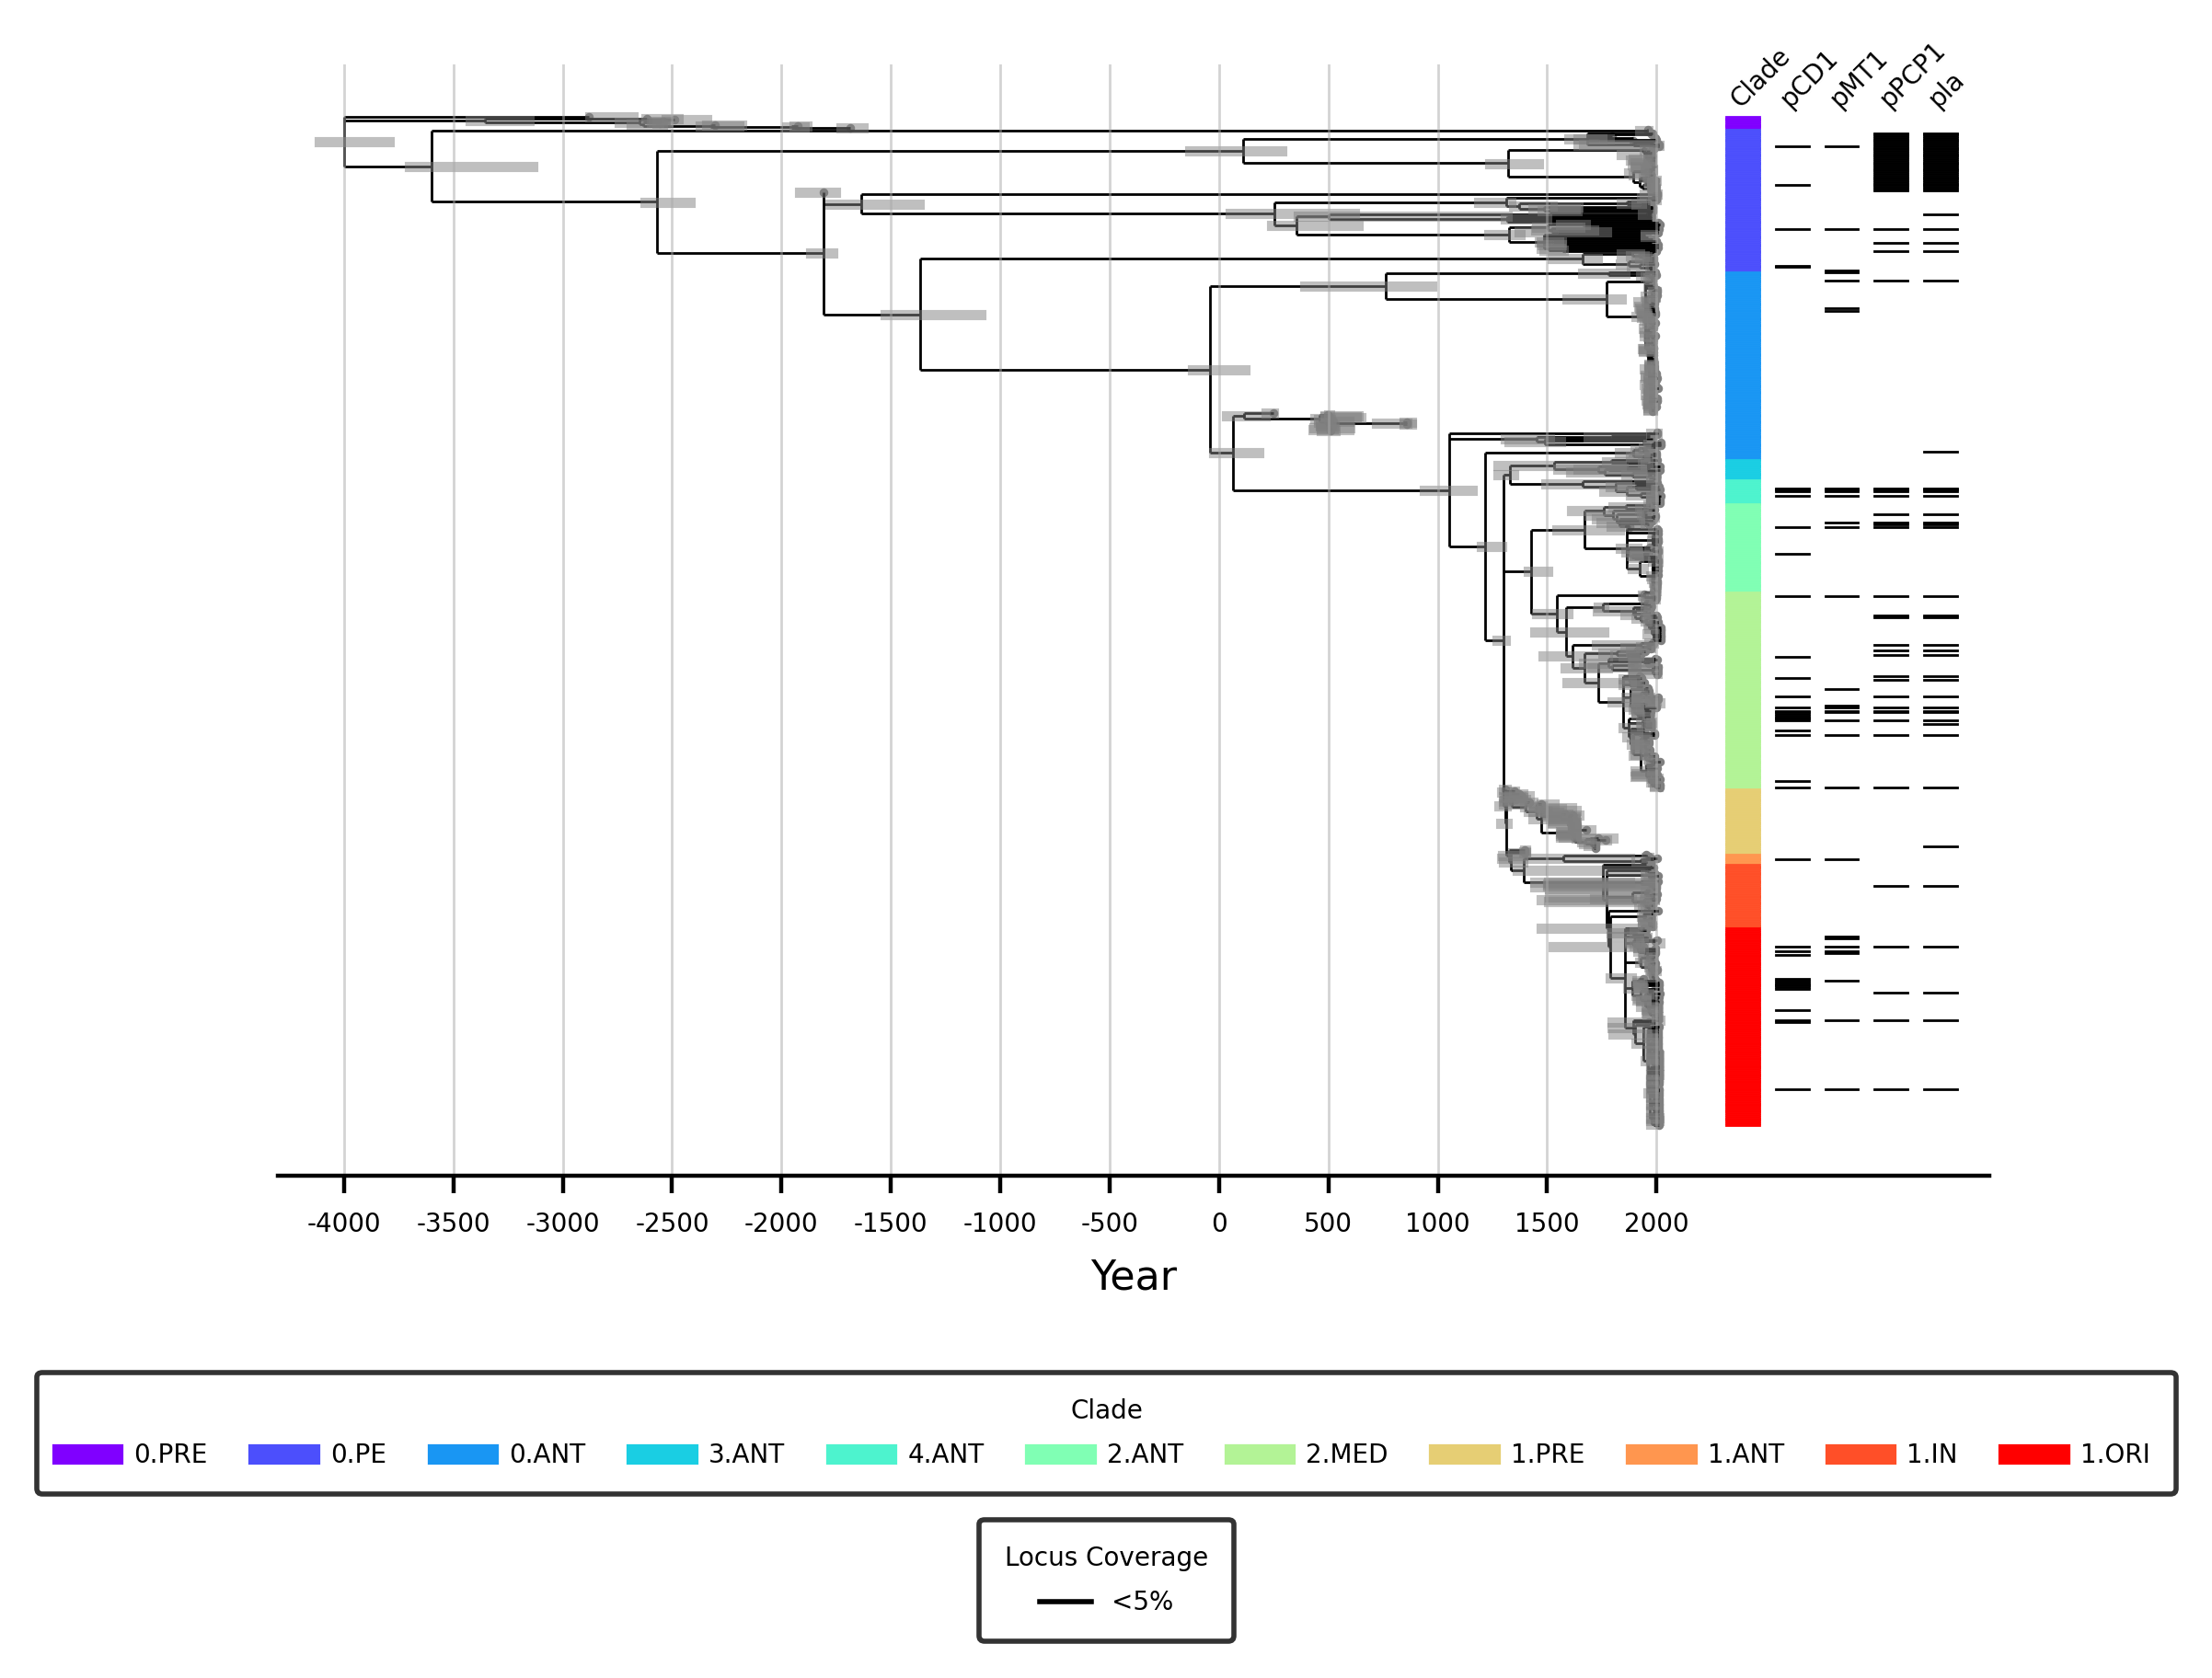

In [13]:
# Plot setup
fig, ax1 = plt.subplots(1, dpi=dpi)

# Colors Setup
attr = "Branch_Major"
attr_lower = attr.lower()
attr_colors_df = colors_df[colors_df["Attribute"] == attr_lower][["State","Color"]]
attr_colors_dict = {}
for rec in attr_colors_df.iterrows():
    state = rec[1]["State"]
    color = rec[1]["Color"]
    attr_colors_dict[state] = color

tt_copy = copy.deepcopy(tt)

# --------------------------------------------
# Phylogeny
Phylo.draw(tt_copy.tree,
           axes=ax1,
           show_confidence=False, 
           label_func = lambda x:'', 
           do_show=False,
          )

# Node Bars
x_min = 0
if hasattr(tt_copy.tree.root, "marginal_inverse_cdf"):
    # Need to invert the node bar units
    present_date = abs(tt_copy.tree.root.numdate - CURRENT_YEAR)
    for rec in tree_df.iterrows():
        conf_bar = rec[1]["timetree_num_date_bar"]
        bar_lower = present_date - conf_bar[0]
        bar_upper = present_date - conf_bar[1]
        y = rec[1]["timetree_coord_y"]
        ax1.plot([bar_lower, bar_upper], [y,y], alpha=0.5, c="grey", linewidth=2)
        
        # Possibly update axis x-limits
        if bar_lower < x_min:
            x_min = bar_lower

# --------------------------------------------
# Heatmap - Branch Major

tip_data = tree_df[(tree_df["Branch_Support_Color"] == TERM_COL)]
ax1.scatter(data=tip_data, x="timetree_coord_x", y="timetree_coord_y", s=0.5, c="grey")

# Heatmap x coordinates will stay the same
heatmap_x_buffer = max(tree_df["timetree_coord_x"]) * 0.05
heatmap_x1 = max(tree_df["timetree_coord_x"]) + heatmap_x_buffer
heatmap_x2 = heatmap_x1 + (0.5 * heatmap_x_buffer)

for rec in tip_data.iterrows():
    y = rec[1]["timetree_coord_y"]
    state = rec[1][attr]
    color = attr_colors_dict[state]
    ax1.plot([heatmap_x1, heatmap_x2], [y,y], alpha=1, c=color, linewidth=0.5)

# Label
ax1.text(x=heatmap_x1, y=-5, s="Clade", ha="left", rotation=45)
    
# --------------------------------------------
# Heatmap - Locus
# Labels
locus_x1 = heatmap_x1
locus_x2 = heatmap_x2        
for locus in locus_cov_df.columns:
    locus_x1 = locus_x2 + (0.25 * heatmap_x_buffer)
    locus_x2 = locus_x1 + (0.5 * heatmap_x_buffer)      
    ax1.text(x=locus_x1, y=-5, s=locus, ha="left", rotation=45)


# Bars
for rec in tip_data.iterrows():   
    locus_x1 = heatmap_x1
    locus_x2 = heatmap_x2 
    sample = rec[0]
    if sample not in locus_cov_df.index: continue
        
    for locus in locus_cov_df.columns:
        locus_x1 = locus_x2 + (0.25 * heatmap_x_buffer)
        locus_x2 = locus_x1 + (0.5 * heatmap_x_buffer)
        cov = locus_cov_df[locus][sample]
        y = rec[1]["timetree_coord_y"]
        if cov < 0.05: 
            ax1.plot([locus_x1, locus_x2], [y,y], alpha=1, c="black", linewidth=0.5)
        #elif cov < 0.70:
        #    ax1.plot([locus_x1, locus_x2], [y,y], alpha=1, c="blue", linewidth=0.5) 

# --------------------------------------------
# Ticks
ticks_dict = convert_timetree_ticks(tree=tt_copy.tree, step=500)
# Set the new tick locations and labels
# Leave out last one
ax1.set_xticks(ticks_dict["tick_locs"][:-1])
ax1.set_xticklabels(ticks_dict["tick_labels"][:-1])
  
# --------------------------------------------
# Lines
# Vertical lines for dates
for loc in ticks_dict["tick_locs"][:-1]:
    ax1.axvline(x=loc, color="darkgrey", alpha=0.5)

# --------------------------------------------
# Limits
x_buffer = math.ceil((ticks_dict["tick_locs"][-1] - ticks_dict["tick_locs"][0]) * 0.05)
y_buffer = math.ceil(len(tt_copy.tree.get_terminals()) * 0.05)

#ax1.set_xlim(0 - x_buffer,)    
ax1.set_ylim(len(tt_copy.tree.get_terminals()) + y_buffer, 0 - y_buffer)
ax1.set_yticks([])    
# --------------------------------------------
# Labels
ax1.set_xlabel("Year")
ax1.set_ylabel("")
#fig.suptitle("{} Mugration".format(attr.replace("_"," ")))  
# --------------------------------------------
# Frames
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)

# -------------------------------
# Legend

legend_lines = [lines.Line2D([0], [0], color=attr_colors_dict[state], lw=4) 
                for state in attr_colors_dict]
legend_labels = [state for state in attr_colors_dict]
fig.legend(legend_lines, 
           legend_labels,
           ncol=len(legend_labels),
           loc="center", 
           bbox_to_anchor=(0.5, -0.05),
           #bbox_to_anchor=(0.14,-0.13),
           frameon=True,
           borderpad=1.0,
           edgecolor="black",
           title="Clade",
           title_fontsize=SM_FONT
          )

locus_lines = [lines.Line2D([0], [0], color="black", lw=1), 
               #lines.Line2D([0], [0], color="blue", lw=1)
              ]
locus_labels = ["<5%", 
                #"<70%"
               ]

fig.legend(locus_lines, 
           locus_labels,
           ncol=len(locus_labels),
           loc="center", 
           bbox_to_anchor=(0.5, -0.15),
           frameon=True,
           borderpad=1.0,
           edgecolor="black",
           title="Locus Coverage",
           title_fontsize=SM_FONT
           )

# Save
out_path = os.path.join(outdir, SCRIPT_NAME + "_locus-coverage." + FMT) 
plt.savefig(out_path, dpi=dpi, bbox_inches = "tight")

---
# 2. Plot Locus Coverage Distribution

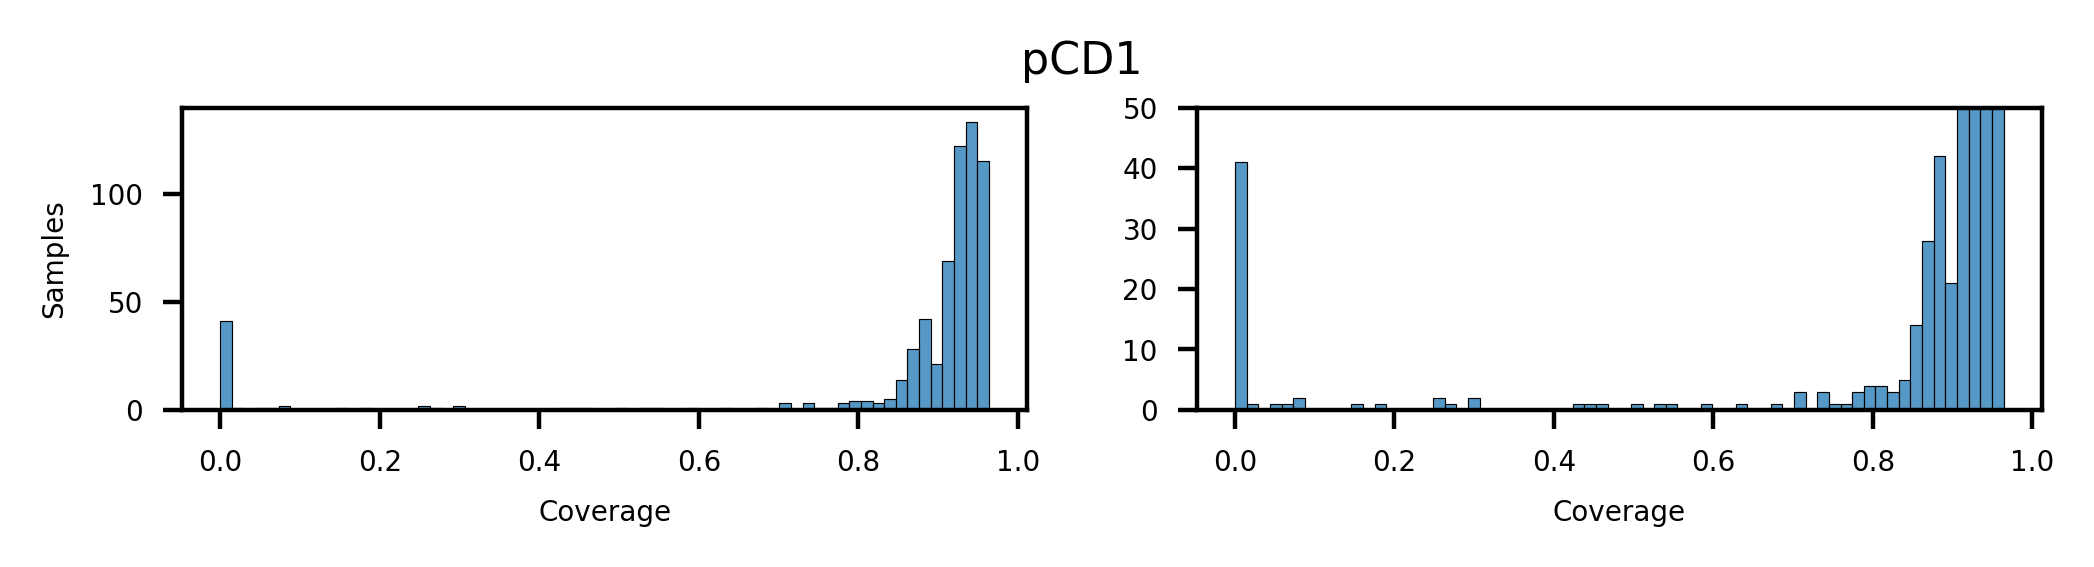

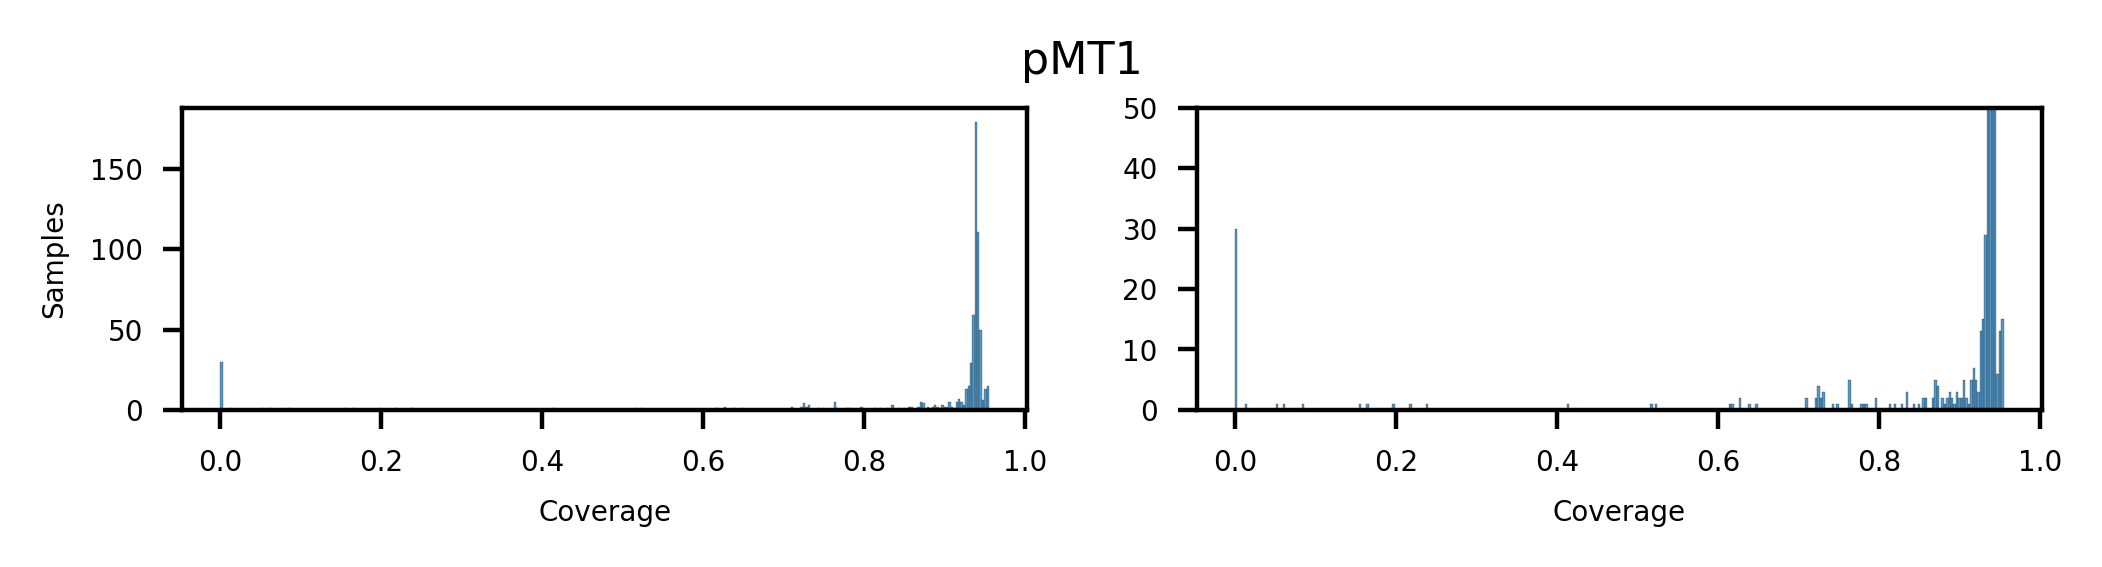

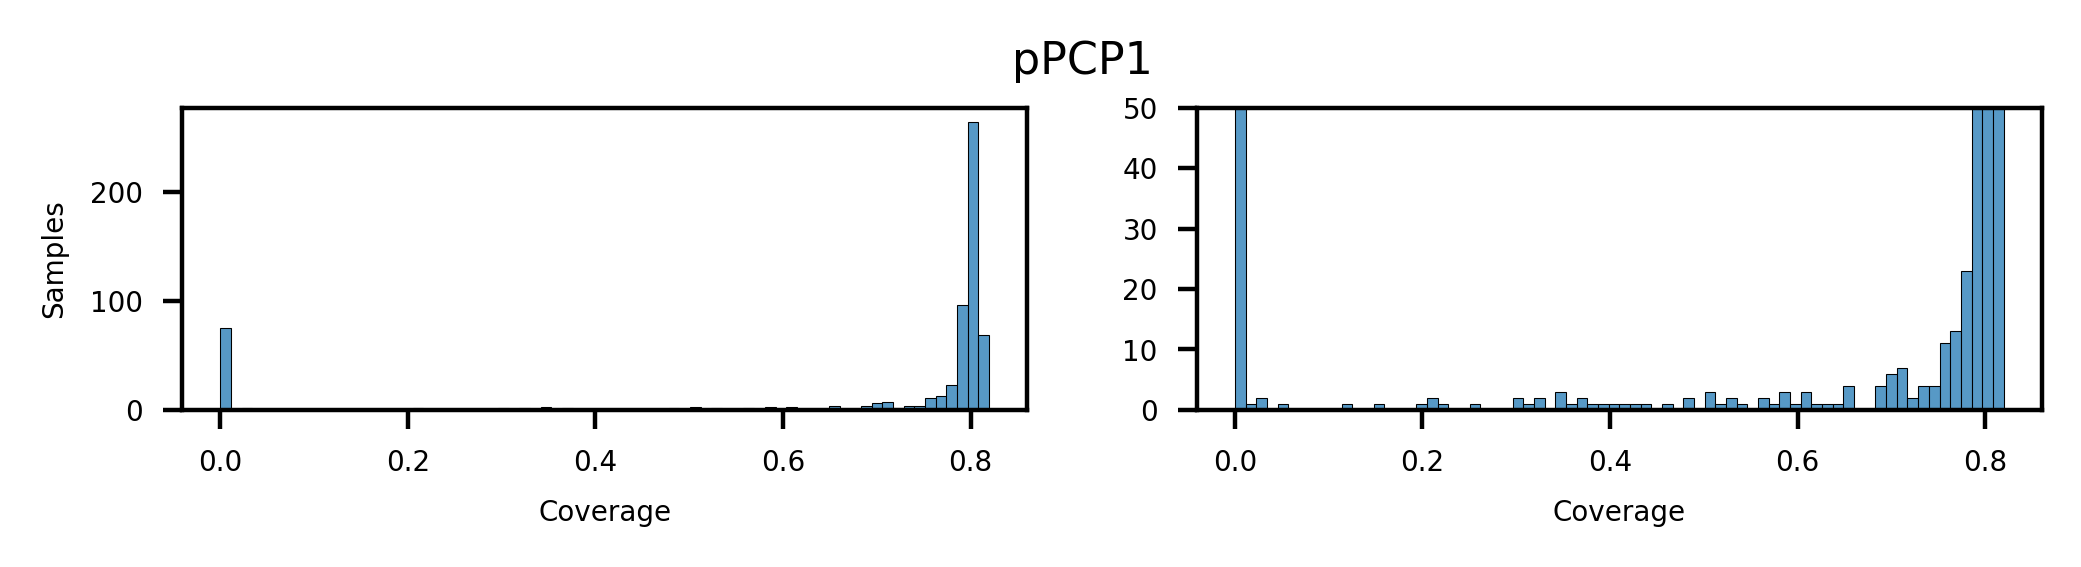

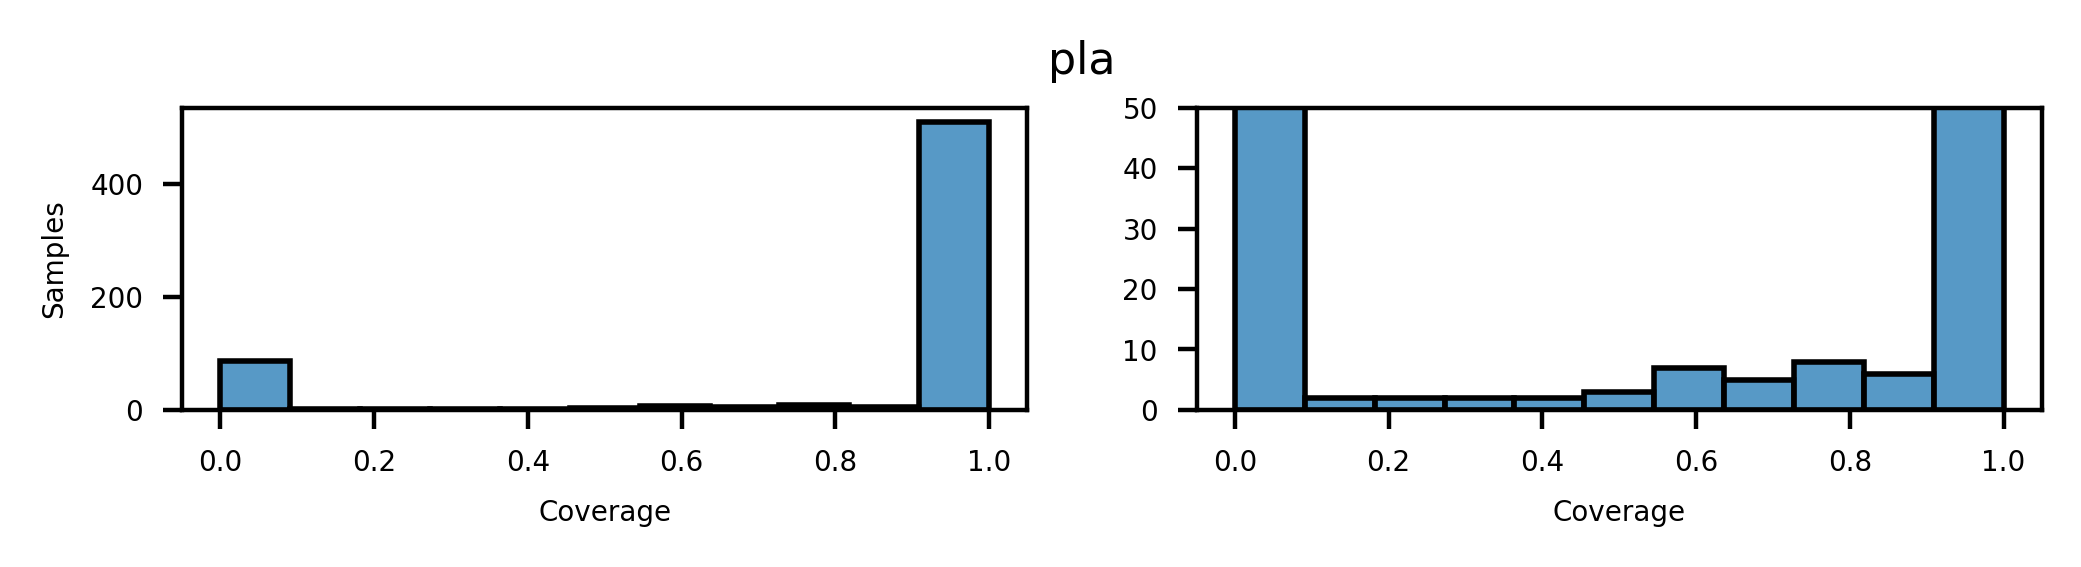

In [10]:
for locus in locus_cov_df.columns:
    fig, axes = plt.subplots(1,2, dpi=dpi, figsize=(6,1), sharex=True)
    sns.histplot(x=locus_cov_df[locus], ax=axes[0])
    sns.histplot(x=locus_cov_df[locus], ax=axes[1])
    axes[1].set_ylim(0,50)
    axes[0].set_xlabel("Coverage", fontsize=SM_FONT)
    axes[1].set_xlabel("Coverage", fontsize=SM_FONT)
    axes[0].set_ylabel("Samples", fontsize=SM_FONT)
    axes[1].set_ylabel("", )
    plt.suptitle(locus, fontsize=MED_FONT, x=0.5, y=1.05)


---
# 3 Identify Interesting Samples

In [35]:
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
pla_neg_df = locus_cov_df[(locus_cov_df["pla"] < 0.1) & (locus_cov_df["pPCP1"] > 0.10)]

display(pla_neg_df)

i_list = []
for i in range(0, len(tree_df.index)):
    sample = tree_df.index[i]
    if sample in pla_neg_df.index:
        i_list.append(i)

tree_df.iloc[i_list]

,pCD1,pMT1,pPCP1,pla
Sample,,,,
GCA_002412225.1_Y.pestis_A-1486_genomic,0.894047,0.938208,0.329276,0.000000
GCA_002412235.1_Y.pestis_A-1249_genomic,0.900476,0.931369,0.256762,0.000000
GCA_001617805.1_Yersinia_pestis_173_genomic,0.913591,0.938395,0.208385,0.000000
SAMEA3713715,0.254292,0.163746,0.565855,0.086354
SAMEA3713714,0.256866,0.197058,0.397004,0.078891
SAMEA3713712,0.159761,0.052011,0.363504,0.037313
SAMEA3713711,0.184169,0.061948,0.404911,0.061834


,UFboot,sCF,Branch_Length,Branch_Support_Color,coord_x,...,Mugration_Province_Lon,locus_coverage_pCD1,locus_coverage_pMT1,locus_coverage_pPCP1,locus_coverage_pla
Name,,,,,,,,,,,
GCA_002412235.1_Y.pestis_A-1249_genomic,NA,NA,4.692e-07,grey,6.91308e-05,...,68.8268,0.900476,0.931369,0.256762,0
GCA_002412225.1_Y.pestis_A-1486_genomic,NA,NA,1.4076e-06,grey,5.5739e-05,...,73.3527,0.894047,0.938208,0.329276,0
GCA_001617805.1_Yersinia_pestis_173_genomic,NA,NA,2.35e-08,grey,6.92844e-05,...,52.8532,0.913591,0.938395,0.208385,0
SAMEA3713715,NA,NA,2.346e-07,grey,7.12288e-05,...,6.06385,0.254292,0.163746,0.565855,0.0863539
SAMEA3713711,NA,NA,2.346e-07,grey,7.16587e-05,...,6.06385,0.184169,0.0619478,0.404911,0.0618337
SAMEA3713714,NA,NA,2.35e-08,grey,7.14438e-05,...,6.06385,0.256866,0.197058,0.397004,0.0788913
SAMEA3713712,NA,NA,2.346e-07,grey,7.16587e-05,...,6.06385,0.159761,0.0520112,0.363504,0.0373134
